# Introduction

Try to built neural network that help us to predict survival probability with help of given features

Using Features with only 10 Epochs with   loss i able to achieve 85% accuracy

**Future Work** : Try any kind of regulization

# **Features in the Dataset**

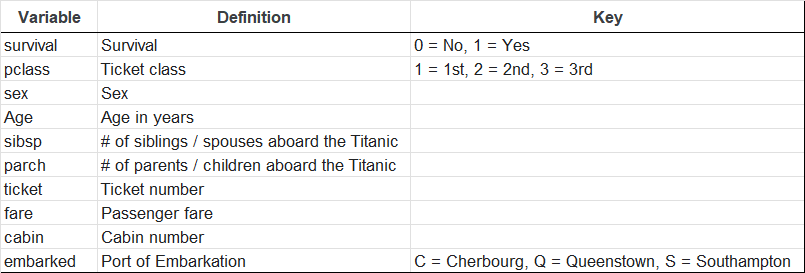

**Variable Notes**
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.



# Import and data loading

In [ ]:
#data input
import pandas as pd
import numpy as np

#Visualization Libraries
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA - Exploratory Data Analysis

In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Handling Misssing Values

In [ ]:
# will check how many NaN values in the dataset
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Observation : Majority of Cabin dataset is missing with around 19% of age data is also missing. will drop cabin feature.
We fill Embarked with Mode and for Age we will see survival rate by age

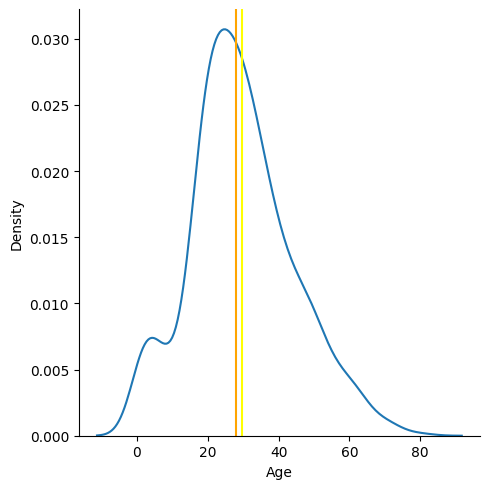

In [ ]:
# dealing with missing Age data

sns.displot(df['Age'], kind='kde')
plt.axvline(df['Age'].mean(),color='yellow')
plt.axvline(df['Age'].median(),color='orange')
plt.show()

#sns.kdeplot(df['Age'])

In [ ]:
df['Age'].mean()

29.69911764705882

In [ ]:
df['Age'].std()

14.526497332334042

In [ ]:
#Binning - grouping the data
bins = [0,10,20,30,40,50,60,70,80]
df['Group_age'] = pd.cut(df['Age'],bins)

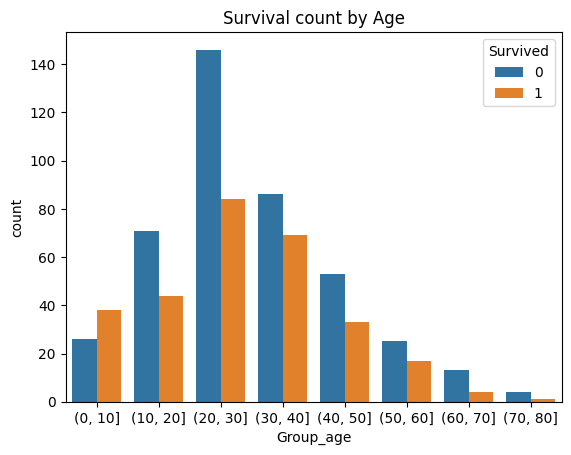

In [ ]:
#survival rate by age
sns.countplot(x='Group_age', hue='Survived', data=df)
plt.title('Survival count by Age')
plt.show()

In [ ]:
# Age -> fillna -> most of people age from 10 to 45 so will replace NaN with random value ranging from 10 to 45
df['Age'] = df['Age'].fillna(np.random.randint(10,45))

#Embarked -> fillna -> Mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Cabin -> drop column
df.drop(columns=['Cabin'], inplace=True)

#Age_Group -> drop
df.drop(columns=['Group_age'], inplace=True)

In [ ]:
df.isna().sum().sum()

0

**Cleaning** **Data**

In [ ]:
#Removes irrelevant columns to clean the dataset.
#Drop -> PassengerId, Name, Ticket

df.drop(columns = ['PassengerId','Name','Ticket'], inplace=True)

# Feature Engineering

In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,26.381785,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.611438,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,13.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
corr=df.corr(numeric_only=True)
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.020055,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.373743,0.083081,0.018443,-0.549500
Age,-0.020055,-0.373743,1.000000,-0.215651,-0.102831,0.127428
SibSp,-0.035322,0.083081,-0.215651,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.102831,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.127428,0.159651,0.216225,1.000000


<Axes: >

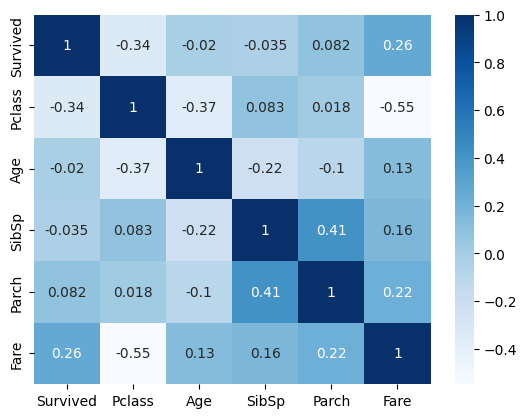

In [ ]:
sns.heatmap(corr,annot=True, cmap='Blues')

# Visualization

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df['Survived'].value_counts(normalize=True)*100

,proportion
Survived,
0,61.616162
1,38.383838


observation : aroung 38% passengers are survived

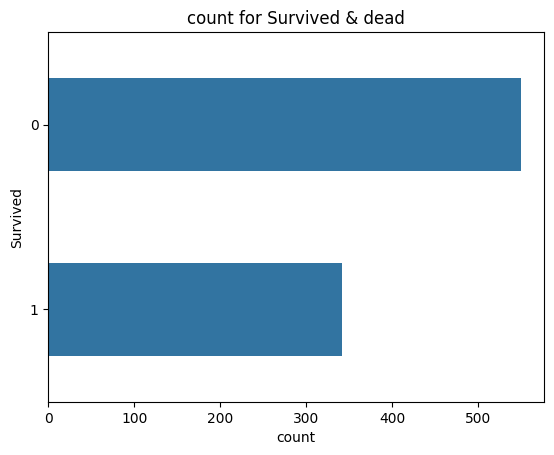

In [ ]:
sns.countplot(y=df['Survived'], width=0.5)
plt.title('count for Survived & dead')
plt.show()

In [ ]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [ ]:
df.groupby(['Sex', 'Survived']).agg(Survived = ('Survived', 'count'))

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

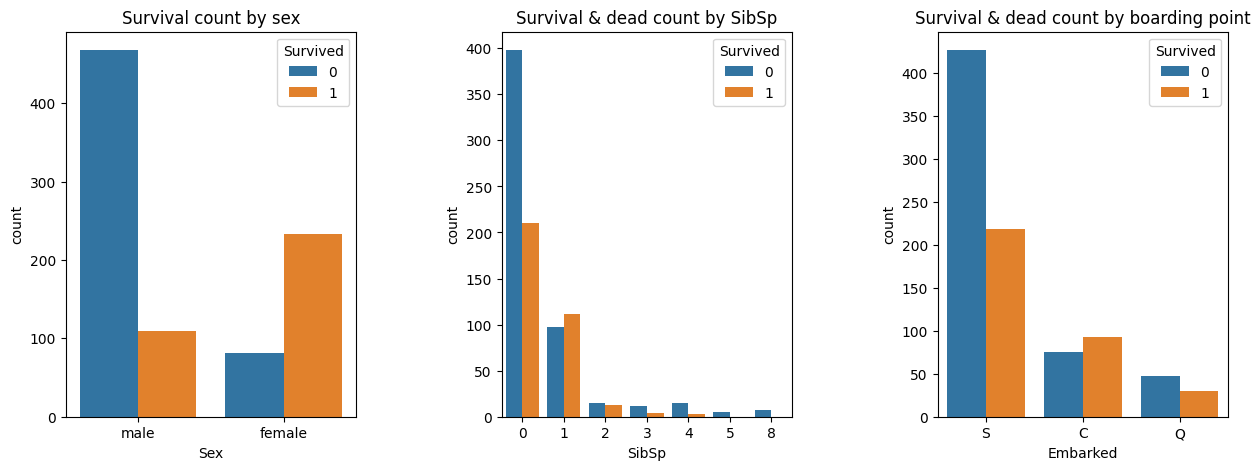

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival count by sex')

plt.subplot(1,3,2)
sns.countplot(x='SibSp',data=df,hue='Survived')
plt.title('Survival & dead count by SibSp')

plt.subplot(1,3,3)
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival & dead count by boarding point')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

Obsevation from Plot : Female(74%) Survival rate is more than men(18%)

Majority of people borded from Southampton. for Cherbourg bording point more people survived

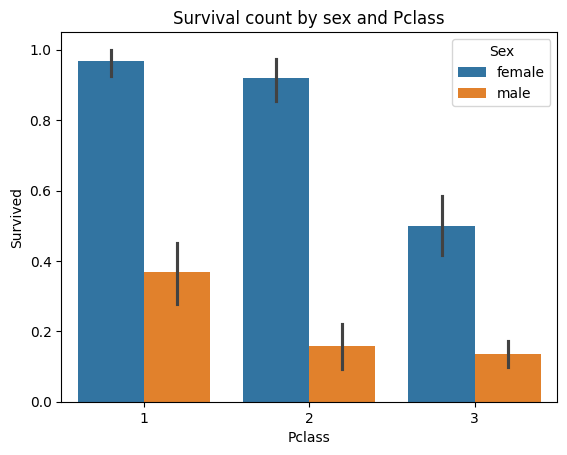

In [ ]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.title('Survival count by sex and Pclass')
plt.show()

**Label Encoding**

convert all the independent categorical columns into numerical columns:


In [ ]:
col_list =['Sex','Embarked' ]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in col_list:
  df[i] = le.fit_transform(df[i])

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


# Model Building
Using sklearn Classifier

In [ ]:
x = df.drop(columns='Survived')
y = df.loc[:,'Survived']

**Standarization**
- scaling the data so that mean of all columns in the data is 0 and standard deviation is 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(x)

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(623, 7) (268, 7) (623,) (268,)


**Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logisticRegr = LogisticRegression()

In [ ]:
# Model Fitting/Training

logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
test_pred = logisticRegr.predict(X_test)

In [ ]:
pred = pd.DataFrame()
pred["y_test"] = y_test  #actual answer key
pred["y_pred"] = test_pred  #answers given by model
pred

,y_test,y_pred
709,1,0
439,0,0
840,0,0
720,1,1
39,1,1
...,...,...
821,1,0
633,0,0
456,0,0
500,0,0


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,test_pred)

0.7985074626865671

**Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
y_test

,Survived
709,1
439,0
840,0
720,1
39,1
290,1
300,1
333,0
208,1
136,1


**Model** **Evaluation**

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       157
           1       0.68      0.68      0.68       111

    accuracy                           0.73       268
   macro avg       0.72      0.72      0.72       268
weighted avg       0.73      0.73      0.73       268



# Deep Learning
Keras sequential API

In [ ]:
!pip install pydot

In [ ]:
!pip install keras
!pip install tensorflow
!pip install ops

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.0/168.0 kB 1.3 MB/s eta 0:00:00


In [ ]:
# Import Libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
import keras
from keras import layers
import ops

In [ ]:
classfier=Sequential()

#Input
classfier.add(Dense(7,activation='relu', input_dim=7))

#Hidden
classfier.add(Dense(32, activation='relu'))

#Output
classfier.add(Dense(1, activation='sigmoid'))

classfier.summary()
classfier.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
classfier.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 32)                256       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 345 (1.35 KB)
Trainable params: 345 (1.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
20/20 [==============================] - 1s 19ms/step - loss: 0.6976 - accuracy: 0.5425 - val_loss: 0.6963 - val_accuracy: 0.5709
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6847 - accuracy: 0.6083 - val_loss: 0.6858 - val_accuracy: 0.5933
Epoch 3/1

In [ ]:
classfier=Sequential()

#Input
classfier.add(Dense(12,activation='relu', input_dim=7))

#Hidden
classfier.add(Dense(32, activation='relu'))
classfier.add(Dense(32, activation='relu'))
classfier.add(Dense(32, activation='relu'))

#Output
classfier.add(Dense(1, activation='sigmoid'))

classfier.summary()

# Compile the model
classfier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
classfier.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
_, accuracy = classfier.evaluate(X_test, y_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                96        
                                                                 
 dense_4 (Dense)             (None, 32)                416       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2657 (10.38 KB)
Trainable params: 2657 (10.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
20/20 [==

In [ ]:
classfier=Sequential()

#Input
classfier.add(Dense(48,activation='relu', input_dim=7))

#Hidden
classfier.add(Dense(32, activation='relu'))
classfier.add(Dense(32, activation='relu'))
classfier.add(Dense(32, activation='relu'))
classfier.add(Dense(32, activation='relu'))

#Output
classfier.add(Dense(1, activation='sigmoid'))

classfier.summary()

# Compile the model
classfier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
classfier.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=16)

# Evaluate the model
_, accuracy = classfier.evaluate(X_test, y_test)

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_131 (Dense)           (None, 48)                384       
                                                                 
 dense_132 (Dense)           (None, 32)                1568      
                                                                 
 dense_133 (Dense)           (None, 32)                1056      
                                                                 
 dense_134 (Dense)           (None, 32)                1056      
                                                                 
 dense_135 (Dense)           (None, 32)                1056      
                                                                 
 dense_136 (Dense)           (None, 1)                 33        
                                                                 
Total params: 5153 (20.13 KB)
Trainable params: 5153 